x_train.shape= (20868, 80, 3)
x_test.shape= (6584, 80, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 70, 100)             │           3,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 35, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 35, 100)             │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 31, 10)              │           5,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 15, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             906 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,716 (37.95 KB)

 Trainable params: 9,516 (37.17 KB)

 Non-trainable params: 200 (800.00 B)

Epoch 1/100
53/53 - 2s - 35ms/step - accuracy: 0.6431 - loss: 1.2171 - val_accuracy: 0.5855 - val_loss: 1.1468
Epoch 2/100
53/53 - 1s - 18ms/step - accuracy: 0.7228 - loss: 0.7882 - val_accuracy: 0.5536 - val_loss: 1.4088
Epoch 3/100
53/53 - 1s - 18ms/step - accuracy: 0.7565 - loss: 0.6379 - val_accuracy: 0.6615 - val_loss: 1.0196
Epoch 4/100
53/53 - 1s - 18ms/step - accuracy: 0.8012 - loss: 0.5421 - val_accuracy: 0.7005 - val_loss: 0.8214
Epoch 5/100
53/53 - 1s - 18ms/step - accuracy: 0.8585 - loss: 0.4175 - val_accuracy: 0.7269 - val_loss: 1.0172
Epoch 6/100
53/53 - 1s - 17ms/step - accuracy: 0.8732 - loss: 0.3732 - val_accuracy: 0.7584 - val_loss: 0.7621
Epoch 7/100
53/53 - 1s - 17ms/step - accuracy: 0.8857 - loss: 0.3455 - val_accuracy: 0.7205 - val_loss: 0.9322
Epoch 8/100
53/53 - 1s - 17ms/step - accuracy: 0.8923 - loss: 0.3297 - val_accuracy: 0.7732 - val_loss: 0.9956
Epoch 9/100
53/53 - 1s - 18ms/step - accuracy: 0.8972 - loss: 0.3579 - val_accuracy: 0.8215 - val_loss: 1.4567
E

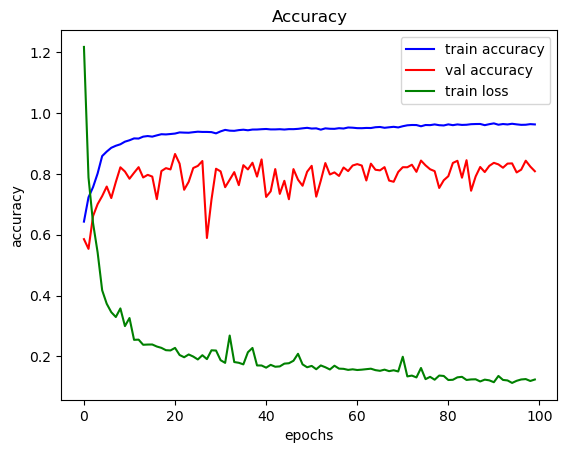

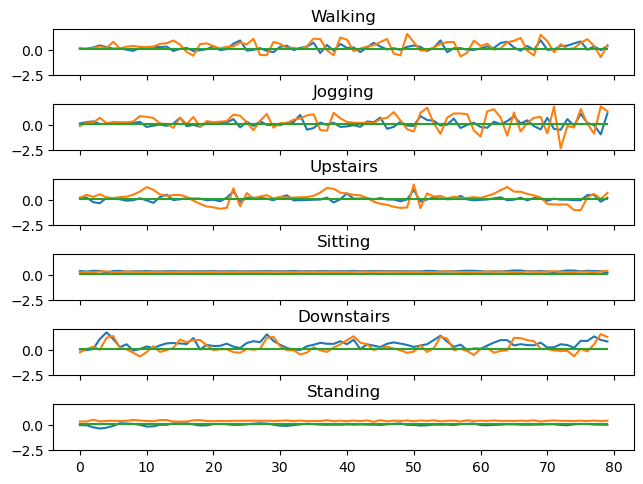

In [1]:
'''
ref1(dataset): http://www.cis.fordham.edu/wisdm/dataset.php
ref2(paper): http://www.cis.fordham.edu/wisdm/includes/files/sensorKDD-2010.pdf
ref3:
https://towardsdatascience.com/human-activity-recognition-har-tutorial-with-keras-and-core-ml-part-1-8c05e365dfa0
ref4:
https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2. 데이터 파싱 및 전처리
def parse_end(s):
    try:
        return float(s[-1])
    except:
        return np.nan
 
def read_data(file_path):
# columns: 'user', 'activity', 'timestamp', 'x-accl', 'y-accl', 'z-accl';
    labels =     {'Walking'   :0,        
                  'Jogging'   :1,
                  'Upstairs'  :2,
                  'Sitting'    :3,
                  'Downstairs':4,
                  'Standing'   :5}    
    data = np.loadtxt(file_path, delimiter=",", usecols=(0,1, 3, 4, 5), # timestamp 제외
                      converters={1:lambda name: labels[name.decode()],
                                  5: parse_end})
    data = data[~np.isnan(data).any(axis=1)] # nan 값을 포함한 행 제거
    return data

# 데이터 로드
data = read_data("./DATA/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt")
##print("user:",     np.unique(data[:,0])) # 36 users
##print("activity:", np.unique(data[:,1])) # 6 activity

#3: normalize x, y, z
mean = np.mean(data[:,2:], axis = 0)
std  = np.std(data[:,2:], axis = 0)
data[:,2:] = (data[:,2:]-mean)/std
##data[:,2:] = (data[:,2:])/np.max(data[:,2:], axis = 0) # [ -1, 1]
##print(np.mean(data[:, 2:], axis = 0)) # [0, 0, 0]
##print(np.std(data[:, 2:], axis = 0))  # [1, 1, 1]

#데이터 분할 (훈련 데이터와 테스트 데이터)
x_train = data[data[:,0] <= 28] #[28, 36]
x_test  = data[data[:,0]  > 28]

#4. 데이터 세그먼트화 및 라벨링 (-1, TIME_PERIODS, 3)   
TIME_PERIODS  = 80  # 세그먼트 길이
STEP_DISTANCE = 40 # if STEP_DISTANCE = TIME_PERIODS, then no overlap
def data_segments(data):
    segments = []
    labels = []
    for i in range(0, len(data)-TIME_PERIODS,  STEP_DISTANCE):
        X = data[i:i+TIME_PERIODS, 2:].tolist() # x, y, z
        
        # label as the most activity in this segment    
        values, counts = np.unique(data[i:i+TIME_PERIODS, 1], return_counts=True)
        label = values[np.argmax(counts)] # 세그먼트 내 가장 빈번한 활동으로 라벨링
    
        segments.append(X)
        labels.append(label)
    
    # reshape (-1, TIME_PERIODS, 3)
    segments = np.array(segments, dtype= np.float32).reshape(-1, TIME_PERIODS, 3)
    labels   = np.asarray(labels)
    return segments, labels

# 훈련 및 테스트 데이터 세그먼트화
x_train, y_train = data_segments(x_train) 	
x_test, y_test = data_segments(x_test)	
print("x_train.shape=", x_train.shape)
print("x_test.shape=",  x_test.shape)

# 라벨 원-핫 인코딩 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#5. 1D CNN 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(TIME_PERIODS,3))) # shape=(80,3)
model.add(tf.keras.layers.Conv1D(filters=100,
                                 kernel_size=11, activation='relu'))
model.add(tf.keras.layers.MaxPool1D())
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=5, activation='relu'))
model.add(tf.keras.layers.MaxPool1D())
model.add(tf.keras.layers.Dropout( rate=0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=6, activation='softmax'))
model.summary()

#6. 모델 컴파일 및 학습
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
               validation_data = (x_test, y_test), verbose=2)  # validation_split=0.2

#7. 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#8. 정확도 및 손실 시각화
plt.title("Accuracy")
plt.plot(ret.history['accuracy'],     "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.plot(ret.history['loss'],         "g-", label="train loss")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()


#9. 샘플 활동 데이터 시각화
activity = ('Walking','Jogging','Upstairs', 'Sitting','Downstairs','Standing')   
train_label  = np.argmax(y_train, axis = 1)

plot_data =[]
n = 1
for i in range(6):
    plot_data.append(np.where(train_label == i)[0][n]) # n-th data

fig, ax = plt.subplots(6, sharex=True,  sharey=True)
fig.tight_layout()
for i in range(6):
    k = plot_data[i]
    ax[i].plot(x_train[k], label=activity[i])
    ax[i].set_title(activity[i])
plt.show()
